# Abalone Age Prediction

**Progetto di Programmazione di Applicazioni Data Intensive**  
Corso di laurea triennale Ingegneria e Scienze Informatiche

**Albi Spahiu**  
albi.spahiu@studio.unibo.it

Anno accademico 2021/2022

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#per abilitare il rendering dei grafici all'interno del file Jupyter
%matplotlib inline

## 1a) Descrizione del problema

- Gli abaloni sono grandi molluschi a rischio di estinzione che si trovano nelle fredde acque costiere di tutto il mondo
- Il prezzo di un abalone è positivamente associato alla sua età
- Tuttavia, determinare l'età di un abalone richiede un processo manuale molto complesso 
  -  l'età dell'abalone viene determinata tagliando la conchiglia attraverso il cono, colorandola e contando il numero di anelli al microscopio
- Per accelerare questo processo, si vuole addestrare un modello che classifichi gli abaloni in `giovani` e `vecchi` sulla base delle sue misure fisiche

![immagine abalone](https://i.pinimg.com/736x/88/fd/0e/88fd0ea8830ef739e830439f8eff13c6--abalone-shell-sea-shells.jpg)

_Immagine abalone_

- Il set di dati "Abalone" utilizzato in questo progetto proviene dal Machine Learning Repository (si può trovare <a href="https://archive-beta.ics.uci.edu/ml/datasets/abalone">qui</a>)
- Nonostante sia stato sviluppato nel 1995, i modelli predittivi che se ne possono ricavare sono ancora rilevanti ai giorni nostri, poiché sono necessari da migliaia a milioni di anni per apportare cambiamenti significativi alle caratteristiche biologiche degli animali, e questo vale anche per gli abaloni

- Importiamo i dati contenuti nel file "abalone.csv"

In [3]:
row_data = pd.read_csv("data/abalone.csv")

In [4]:
row_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
row_data.shape

(4177, 9)

In [6]:
row_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### Descrizione variabili

Come visto precedentemente, il dataset contiene 4177 righe e 9 colonne. Il data set è già stato privato dei valori mancanti e l'intervallo dei valori continui è stato scalato per essere utilizzato con una Rete Neurale Artificiale (dividendo per 200). Per ogni abalone abbiamo le seguenti _feature_:

- **Sex** : il sesso dell'Abalone, che può essere maschio (M), femmina (F) o neonato/infante (I).
- **Length** : misura della conchiglia più lunga (in mm)
- **Diameter** : il diametro perpendicolare alla lunghezza (in mm)
- **Height** : altezza con la carne nella conchiglia (in mm)
- **Whole weight** : peso abalone intero (in grammi)
- **Shucked weight** : peso della carne (in grammi)
- **Viscera weight** : peso delle viscere, dopo il dissanguamento (in grammi)
- **Shell weight** : peso della conchiglia dopo essere stata essiccata (in grammi)
- **Rings** : +1,5 indica l'età in anni

In [8]:
data = row_data.copy()

- `Rings` rappresenta implicitamente l'età dell'abalone
- Necessita però di alcune trasformazioni per ottenere la nostra variabile da predire

In [9]:
data["Age"] = data["Rings"] + 1.5  # otteniamo così l'eta in anni
data.drop("Rings", axis=1, inplace=True)

In [10]:
data["Age"].mean()

11.433684462532918

- Definiamo una funzione per mappare l'età del abalone, usando come soglia l'eta media degli abaloni:

In [11]:
def convert_age(age):
  if age >= 11.5:
    return 'Old'
  else:
    return 'Young'

In [12]:
data.Age = data.Age.apply(convert_age)

In [13]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,Young
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,Old
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,Young


In [14]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   object 
dtypes: float64(7), object(2)
memory usage: 714.0 KB


- Le colonne `Sex` e `Age` sono considerate di tipo `object` in quanto stringa, ma sappiamo essere categoriche

In [15]:
data = data.astype({'Sex': 'category', 'Age': 'category'})
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Age             4177 non-null   category
dtypes: category(2), float64(7)
memory usage: 237.2 KB


- Facendone il casting otteniamo un DataFrame con gli stessi dati ma con occupazione di memoria ridotta di quasi 3 volte

In [16]:
data['Age'].value_counts()

Young    2096
Old      2081
Name: Age, dtype: int64

In [17]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

- La variabile **Sex** comprende tre categorie: `femmina`, `maschio` e `neonato`. Si tratta di una componente curiosa del set di dati, poiché il sesso dell'abalone è in realtà binario (maschio o femmina). Pertanto il neonato non è considerato un sesso dell'abalone, ma si riferisce bensì alla sua età 
- L'abalone di sesso diverso ha una composizione corporea diversa con valori economici distinti

## 1b) Analisi esplorativa dei dati

In [19]:
import altair as alt
import seaborn as sns


# variabili numeriche
numeric_variables = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]

- Come già anticipato, il data set non ha valori mancanti

In [20]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

- Torniamo ad analizzare la variabile `Sex`

In [21]:
data["Sex"].value_counts(normalize=True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

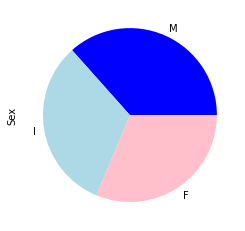

In [22]:
data["Sex"].value_counts().plot.pie(colors=["blue", "lightblue", "pink"]);

- Analizziamo la distribuzione di questa feature rispetto alla nostra variabile da predire  

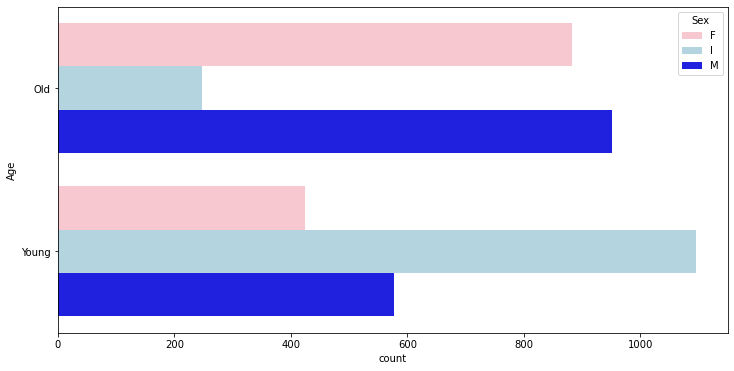

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(y="Age", hue="Sex",
                data=data, palette=["pink", "lightblue", "blue"]);

In [55]:
data.groupby("Age")["Sex"].value_counts(sort=False)

Age     
Old    F     883
       I     247
       M     951
Young  F     424
       I    1095
       M     577
Name: Sex, dtype: int64

- Si osserva una distribuzione uniforme di femmine (F) e maschi (M) nelle due classi, mentre c'è un maggior numero di infanti (I) nella classe dei giovani (1095) rispetto a quella dei vecchi (247)
- Come ci si aspettava, non c'è una tendenza a privilegiare un sesso particolare (maschio o femmina) a seconda che l'abalone sia vecchio o giovane. Tuttavia, il maggior numero di abaloni neonati nella classe dei giovani fa riflettere. Le nostre intuizioni ci dicono che un maggior numero di abaloni neonati andrebbe classificato come giovane, ma ciò può creare ridondanza nel modello predittivo. È curioso che i ricercatori abbiano deciso di includere la categoria Infant nella colonna delle caratteristiche del sesso. Forse quando un abalone è un neonato è difficile classificarlo come maschio o femmina. Senza parlare con esperti del settore, è difficile determinare il significato della categoria Infant all'interno della caratteristica Sex

- Con `describe` otteniamo le statistiche di base per le colonne *numeriche*

In [57]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


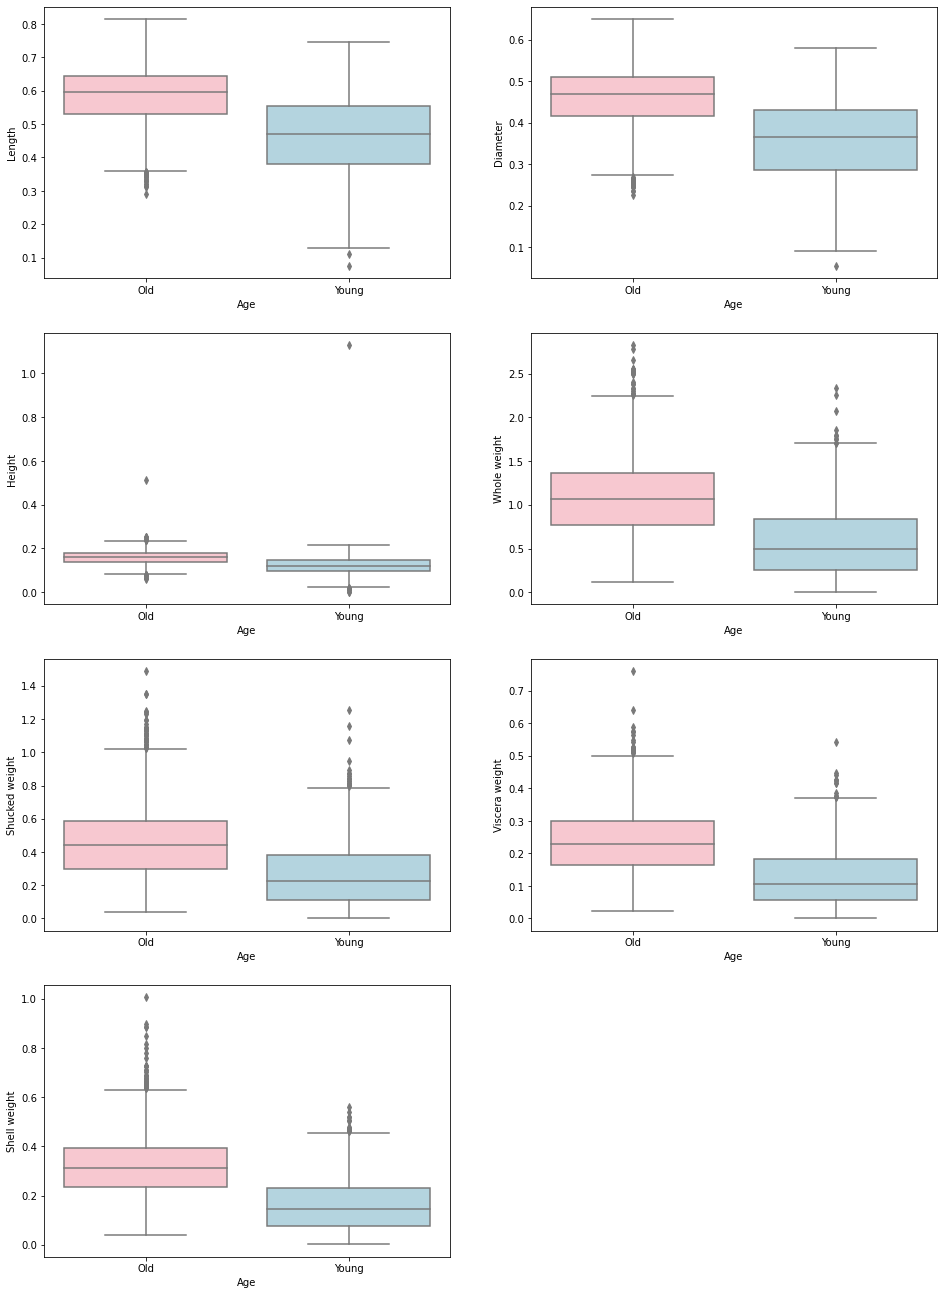

In [29]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
plt.figure(figsize=(16, 35))
for n, t in enumerate(numeric_variables, start=1):
    # data.boxplot(ax=plt.subplot(6,2,n), column=t, by="Age", showmeans=True);
    sns.boxplot(x="Age", y=t, data=data, palette=["pink", "lightblue", "blue"], ax=plt.subplot(6,2,n));

- Vediamo la distribuzione delle variabili numeriche rispetto la classe da predire
- La distribuzione delle feature numeriche sembra seguire una forma simile sia per la classe dei vecchi che per quella dei giovani
   - La distribuzione delle feature `Length` e `Diameter` hanno la stessa distribuzione obliqua verso sinistra
   - `Whole weight`, `Shucked weight`, `Viscera weight` e `Shell weight` hanno sempre una distribuzione obliqua, ma verso destra
   - La feature `Height` non presenta una distribuzione obliqua

In [58]:
alt.Chart(data).mark_bar(
    opacity=0.5
).encode(
    alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=50)),
    alt.Y("count()", stack=None),
    color="Age",
).repeat(numeric_variables, columns=2)


alt.RepeatChart(...)

- Ci sono alcune aree che potrebbero aiutarci a capire come il modello potrebbe fare previsioni:
    - Osservando la feature `Length`, possiamo notare che quando la lunghezza dell'abalone è inferiore a 0,30, quasi tutti gli esempi appartengono alla classe dei giovani e pochissimi a quella dei vecchi
    - Analogamente, per quanto riguarda la feature `Diameter`, quando il diametro dell'abalone è inferiore a 0,22, praticamente tutti gli esempi appartengono alla classe dei giovani
    - Ciò è intuitivo, poiché dovremmo aspettarci che gli abaloni più giovani siano più piccoli (cioè di diametro e lunghezza inferiori)
- Invece:
    - Quando il peso della conchiglia (`Shell Weight`) è superiore a 0,45, la maggior parte degli esemplari appartiene alla classe dei vecchi
    - Lo stesso si verifica quando il peso intero (`Whole Weight`) è superiore a 1,5: la classe dei vecchi inizia a essere quella predominante. 
        - Anche in questo caso, ciò è in linea con le nostre intuizioni. Ci aspetteremmo che gli abaloni più vecchi siano più grandi e quindi abbiano un peso intero maggiore
        - In termini di peso della conchiglia, forse gli abaloni della classe vecchia hanno bisogno di una conchiglia più grande per i loro corpi più grandi rispetto a quelli giovani, il che potrebbe spiegare perché ci sono più esempi di abaloni vecchi con un peso della conchiglia superiore a 0,6

- Gli istogrammi mostrano inoltre un buon bilanciamento delle classi
- Come ulteriore conferma, mostriamo la distribuzione tra gli abaloni giovani e vecchi

In [59]:
data["Age"].value_counts(normalize=True)

Young    0.501796
Old      0.498204
Name: Age, dtype: float64

<AxesSubplot:ylabel='Age'>

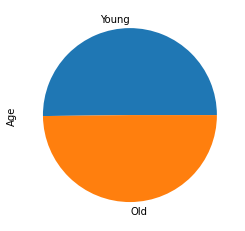

In [61]:
data["Age"].value_counts().plot.pie();

- Possiamo poi aspettarci una colinearità nelle nostre caratteristiche numeriche

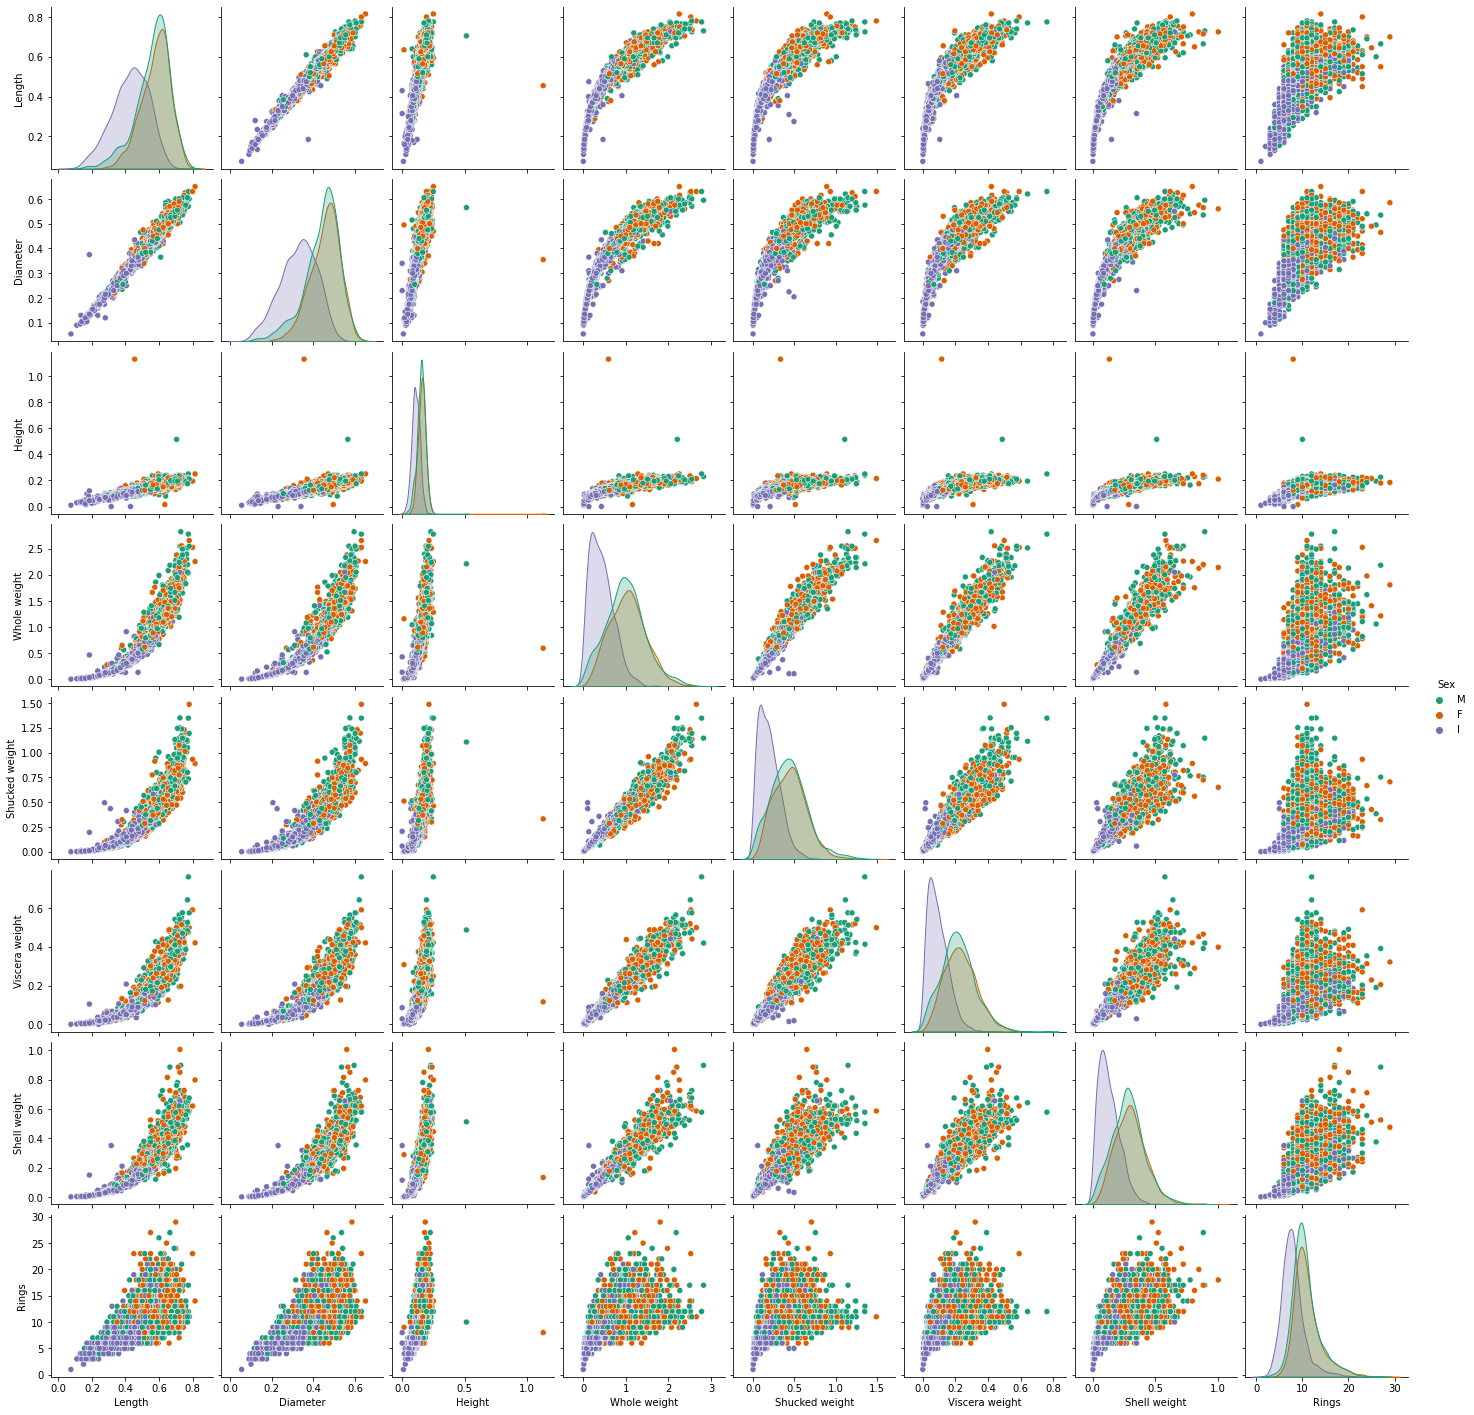

In [ ]:
sns.pairplot(data = row_data, hue = 'Sex', palette = 'Dark2')

- Dai diagrammi di dispersione si evince che lunghezza, diametro e altezza sono correlati in modo lineare
- C'è una correlazione anche tra le dimensioni e il peso, che segue un andamento meno lineare
- Anche le caratteristiche del peso sono correlate tra loro, ma non sono forti come quelle delle dimensioni
- Le relazione con l'età è difficile da definire. Approssimativamente, si tratta di una relazione positiva

- Usiamo una heatmap per fornire una rappresentazione visivamente più intuitiva delle correlazioni tra tutte le variabili

<AxesSubplot:>

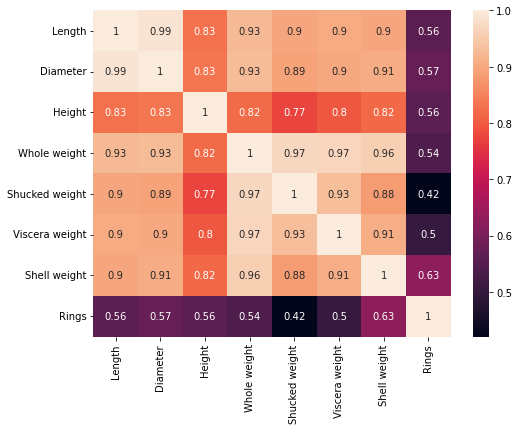

In [26]:
plt.figure(figsize = (8,6))
corr = row_data.corr(method="pearson")
sns.heatmap(corr, annot = True);

- Sembra che le caratteristiche numeriche siano altamente correlate tra loro e moderatamente correlate con gli anelli (che sono un indicatore dell'età dell'abalone)
- Per quanto riguarda la correlazione con gli anelli, il peso della conchiglia sembra avere il valore di correlazione maggiore (0,63) con gli anelli, mentre il peso del mollusco sembra avere la correlazione minore (0,42)

## 2) Normalizzazione e rilevazione delle feature più rilevanti

In [30]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [29]:
data_bin = data.copy()
data_bin = data.drop(["Age"], axis=1)
data_bin["Is old"] = np.where(data["Age"] == "Young", 0, 1)

In [30]:
data_bin

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Is old
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


#### Trattamento delle variabili categoriche: one-hot encoding

- Come si possono utilizzare le variabili categoriche in modelli di regressione?
- La soluzione tipica consiste nel convertire le variabili categoriche in numeriche
- Data una variabile categorica X con N valori possibili $a, b, c, \ldots$, il _one-hot encoding_ consiste nel convertirla in N variabili numeriche binarie $X_a, X_b, X_c, \ldots$
- Ciascuna variabile $X_v$
  - vale 1 nei casi in cui $X = v$
  - vale 0 negli altri casi
- Ogni valore di X è in pratica convertito ad un vettore in $\mathbf{R}^N$ con un elemento a 1 e gli altri a 0
  - $a \rightarrow [1,0,0,\ldots]$
  - $b \rightarrow [0,1,0,\ldots]$
  - $c \rightarrow [0,0,1,\ldots]$
  - ...

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)

### Discretizzazione/binarizzazione delle feature

In [ ]:
data_enc = data_bin[["Sex"]]
data_enc

,Sex
0,M
1,M
2,F
3,M
4,I
...,...
4172,F
4173,M
4174,M
4175,F


In [ ]:
encoder.fit_transform(data_enc)

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
pd.DataFrame(
    encoder.transform(data_enc),
    columns=encoder.get_feature_names(data_enc.columns)
).head(5)

c:\Users\albis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sex_F,Sex_I,Sex_M
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


### Divisione training-validation con scikit-learn

- Abbiamo visto il metodo _hold-out_ in cui i dati disponibili sono divisi in training e validation set
- scikit-learn fornisce un'apposita funzione `train_test_split` per suddividere casualmente un set di dati in due insiemi "train" e "test" disgiunti
  - il set di dati è una sequenza di elementi, es. array NumPy o serie/frame pandas
  - con l'opzione `test_size=X` si indica la proporzione (se X decimale tra 0 e 1) o il numero di elementi (se X intero) da inserire nel test (default 0.25, ovvero 25\%)
  - tutti i dati non selezionati per il test sono implicitamente selezionati per il train
  - con l'opzione `random_state` si indica un seed per la riproducibilità: richiamando la funzione più volte con `random_state` e altri parametri uguali viene riprodotta esattamente la stessa suddivisione
- Dividiamo i nostri dati in due parti `train` e `val`, contenenti rispettivamente 2/3 e 1/3 dei dati

In [34]:
data_bin

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Is old
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [35]:
from sklearn.model_selection import train_test_split
y = data_bin["Is old"]
X = data_bin.drop(columns=["Is old"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [36]:
y

0       1
1       0
2       0
3       1
4       0
       ..
4172    1
4173    1
4174    0
4175    1
4176    1
Name: Is old, Length: 4177, dtype: int32

In [37]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [41]:
preprocessor = ColumnTransformer([
    # nome           filtro            colonne
    ( "numeric"    , StandardScaler(), ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'] ),
    ( "categorical", OneHotEncoder() , ['Sex'])
])

In [42]:
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)

## Perceptron

- Il _perceptron_ è un algoritmo di apprendimento molto semplice, concettualmente simile alla discesa gradiente
  - i parametri $\mathbf{w}$ e $b$ sono inizializzati casualmente
  - si itera il training set: per ogni istanza mal classificata, i parametri vengono aggiornati proporzionalmente ai valori di $\mathbf{x}$ e ad un _learning rate_ preimpostato
  - si possono eseguire molteplici iterazioni del training set
- Per creare un modello perceptron, come per i modelli di regressione, iniziamo creando un'istanza della classe `Perceptron`
  - ci sono diversi parametri impostabili per ottenere varianti (es. con regolarizzazione), ma quì non le consideriamo

In [43]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline


### Normalizzazione/standardizzazione

In [44]:
X_train_proc

array([[ 0.36501294,  0.40649702,  0.22925817, ...,  1.        ,
         0.        ,  0.        ],
       [-0.92833504, -0.85446445, -0.93992071, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.61664001,  1.56658157,  1.39843706, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.13563789, -0.14832603, -0.35533127, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.40673384,  0.5578124 , -0.47224916, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.57361745,  0.65868931,  0.46309395, ...,  1.        ,
         0.        ,  0.        ]])

In [45]:
X_val_proc

array([[ 0.65705926,  0.45693548,  0.46309395, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.53189655,  0.3056201 ,  0.22925817, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.28157113,  0.35605856,  1.28151917, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.01047518, -0.2996414 , -0.35533127, ...,  0.        ,
         0.        ,  1.        ],
       [-0.71973053, -0.70314908, -0.47224916, ...,  0.        ,
         1.        ,  0.        ],
       [-1.01177684, -1.05621829, -0.93992071, ...,  0.        ,
         1.        ,  0.        ]])

In [46]:
model = Perceptron()
model.fit(X_train_proc, y_train)
model.score(X_val_proc, y_val)

0.6346015793251975

In [47]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
4114,F,0.570,0.450,0.150,0.9645,0.5310,0.1890,0.2090
1556,I,0.415,0.325,0.100,0.3130,0.1390,0.0625,0.0965
3470,M,0.720,0.565,0.200,1.7870,0.7180,0.3850,0.5290
361,F,0.590,0.465,0.150,0.9970,0.3920,0.2460,0.3400
135,F,0.425,0.330,0.115,0.4060,0.1635,0.0810,0.1355
...,...,...,...,...,...,...,...,...
3444,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.1450
466,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.4000
3092,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.1880
3772,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.2350


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xn_train = scaler.fit_transform(X_train.drop("Sex", axis=1))
Xn_val = scaler.transform(X_val.drop("Sex", axis=1))

In [50]:
model = Perceptron(random_state=42)
model.fit(Xn_train, y_train)

Perceptron(random_state=42)

In [51]:
model.coef_[0]

array([ 1.34892097e-14,  2.16885373e+00,  4.67671555e-01,  9.66967825e+00,
       -7.93802419e+00, -1.64335777e+00,  1.75572740e+00])

In [52]:
model.intercept_[0]

0.0

In [53]:
model.score(Xn_val, y_val)

0.7846374730796841

### Regolarizzazione con norma L1 (per individuare le feature più rilevanti)

In [ ]:
model_l1 = Perceptron(penalty='l1', alpha=0.0001, random_state=42)
model_l1.fit(X_train, y_train)

Perceptron(penalty='l1', random_state=42)

In [ ]:
pd.Series(model_l1.coef_[0], index=X_train.columns)

Length            -5.8208
Diameter           0.0000
Height             0.6058
Whole weight       8.6008
Shucked weight   -15.4938
Viscera weight    -1.5433
Shell weight       9.7413
dtype: float64

In [ ]:
model_l1.score(X_val, y_val)

0.7853553481694185

## 3) Generazione di modelli di learning

generazione di diversi modelli di learning usando tutti gli algoritmi visti a lezione che siano applicabili al
caso di studio prescelto impiegando **random search** e **grid search in k (nested) cross fold validation** allo
scopo di individuare gli iperparametri migliori in modo corretto. Nel caso le classi del problema prescelto
siano sbilanciate, applicare uno o più metodi per il trattamento di tali casi.

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

c:\Users\albis\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

print('Classification Report: \n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_val, y_val)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       722
           1       0.77      0.78      0.77       671

    accuracy                           0.78      1393
   macro avg       0.78      0.78      0.78      1393
weighted avg       0.78      0.78      0.78      1393

Confusion Matrix: 
 [[566 156]
 [150 521]]
Training Score:  0.7722701149425287
Testing Score:  0.7803302225412778


### Support Vector Classifiers

In [ ]:
svc = SVC(C = 1, gamma= 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)

print('Classification Report: \n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_val, y_val)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       722
           1       0.77      0.79      0.78       671

    accuracy                           0.79      1393
   macro avg       0.79      0.79      0.79      1393
weighted avg       0.79      0.79      0.79      1393

Confusion Matrix: 
 [[566 156]
 [143 528]]
Training Score:  0.7855603448275862
Testing Score:  0.7853553481694185


### K Nearest Neighbour Classifier

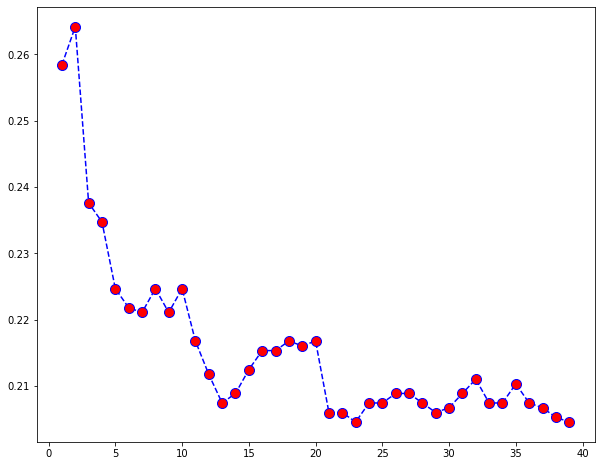

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_val)
    error_rate.append(np.mean(y_val != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

print('Classification Report: \n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
knn_train_acc = knn.score(X_train, y_train) 
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_val, y_val)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       722
           1       0.77      0.80      0.79       671

    accuracy                           0.79      1393
   macro avg       0.79      0.79      0.79      1393
weighted avg       0.79      0.79      0.79      1393

Confusion Matrix: 
 [[562 160]
 [131 540]]
Training Score:  0.802801724137931
Testing Score:  0.7910983488872936


### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)

print('Classification Report: \n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
dt_train_acc = dt.score(X_train, y_train) 
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_val, y_val)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       722
           1       0.76      0.72      0.74       671

    accuracy                           0.76      1393
   macro avg       0.76      0.76      0.76      1393
weighted avg       0.76      0.76      0.76      1393

Confusion Matrix: 
 [[568 154]
 [185 486]]
Training Score:  0.8010057471264368
Testing Score:  0.756640344580043


### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print('Classification Report: \n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
rf_train_acc = rf.score(X_train, y_train) 
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_val, y_val)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       722
           1       0.76      0.83      0.79       671

    accuracy                           0.79      1393
   macro avg       0.79      0.79      0.79      1393
weighted avg       0.79      0.79      0.79      1393

Confusion Matrix: 
 [[543 179]
 [117 554]]
Training Score:  0.8157327586206896
Testing Score:  0.7875089734386217


### AdaBoost Classifier

In [ ]:
adb = AdaBoostClassifier(n_estimators= 100)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_val)

print('Classification Report: \n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
adb_train_acc = adb.score(X_train, y_train) 
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_val, y_val)
print('Testing Score: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       722
           1       0.76      0.80      0.78       671

    accuracy                           0.78      1393
   macro avg       0.78      0.78      0.78      1393
weighted avg       0.78      0.78      0.78      1393

Confusion Matrix: 
 [[551 171]
 [137 534]]
Training Score:  0.8078304597701149
Testing Score:  0.7788944723618091


### Gradient Boosting 

In [ ]:
gdb = GradientBoostingClassifier(n_estimators= 200, max_depth = 2, min_samples_leaf= 2)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_val)

print('Classification Report: \n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
gdb_train_acc = gdb.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_val, y_val)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       722
           1       0.77      0.82      0.79       671

    accuracy                           0.79      1393
   macro avg       0.79      0.79      0.79      1393
weighted avg       0.80      0.79      0.79      1393

Confusion Matrix: 
 [[553 169]
 [119 552]]
Training Score:  0.8315373563218391
Testing Score:  0.7932519741564967


### XGBoost Classifier

In [ ]:
xgb = XGBClassifier(objective = "binary:logistic", n_estimators = 100, max_depth = 3, subsample = 0.8, colsample_bytree = 0.6, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

print('Classification Report: \n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
xgb_train_acc = xgb.score(X_train, y_train) 
print('Training Score: ', xgb_train_acc)
xgb_test_acc = xgb.score(X_val, y_val)
print('Testing Score: ', xgb_test_acc)

c:\Users\albis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\albis\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:13:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.76      0.80       722
           1       0.77      0.83      0.80       671

    accuracy                           0.80      1393
   macro avg       0.80      0.80      0.80      1393
weighted avg       0.80      0.80      0.80      1393

Confusion Matrix: 
 [[551 171]
 [112 559]]
Training Score:  0.8272270114942529
Testing Score:  0.7968413496051687


c:\Users\albis\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\albis\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## 4) Valutazione dei modelli